In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df= pd.read_csv('/content/final_model_data.csv')

In [3]:
#show DF
df.head()

,Unnamed: 0.1,Unnamed: 0,Model,Oversample,Scaler,Neighbors,precision,recall,f1-score,support
0,0,Active,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.989067,0.766646,0.863768,3304.000000
1,1,Inactive,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.471193,0.960839,0.632306,715.000000
2,2,accuracy,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.801194,0.801194,0.801194,0.801194
3,3,macro avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.730130,0.863743,0.748037,4019.000000
4,4,weighted avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.896935,0.801194,0.822590,4019.000000


In [4]:
# Shorten SVM
df.replace("Support Vector Machines (SVM)","SVM",inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,Model,Oversample,Scaler,Neighbors,precision,recall,f1-score,support
0,0,Active,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.989067,0.766646,0.863768,3304.000000
1,1,Inactive,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.471193,0.960839,0.632306,715.000000
2,2,accuracy,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.801194,0.801194,0.801194,0.801194
3,3,macro avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.730130,0.863743,0.748037,4019.000000
4,4,weighted avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.896935,0.801194,0.822590,4019.000000


In [28]:
# Name column
accuracy_df = df[df['Unnamed: 0'] == 'accuracy']

# aggregate averages
accuracy_df = accuracy_df.groupby('Model', as_index=False).agg(
    avg_precision = ('precision', 'mean')
)

# back to orginal df
accuracy_df = pd.DataFrame(accuracy_df)
accuracy_df

,Model,avg_precision
0,Decision Tree,0.841976
1,K-Nearest Neighbors (kNN),0.828549
2,Logistic Regression,0.791714
3,Naive Bayes,0.706942
4,Random Forests,0.829609
5,SVM,0.928266


In [29]:
# Extract the accuracy values
accuracy_values = accuracy_df['avg_precision'].tolist()
print(accuracy_values) 

[0.841975615824832, 0.8285493903956208, 0.7917143568051754, 0.7069420253794476, 0.8296093555610848, 0.928265737745708]


In [30]:
# Calculate the average accuracy
average_accuracy = sum(accuracy_values) / len(accuracy_values)

In [31]:
# Print the average accuracy
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8211760802853115


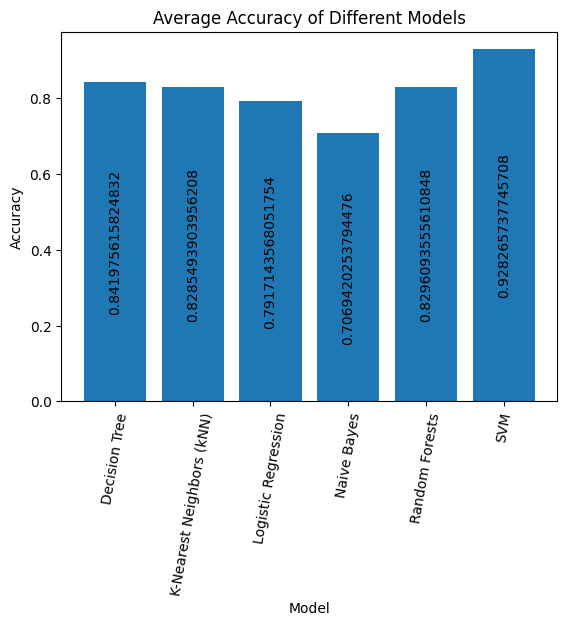

In [32]:
# Create a bar graph to visualize the average accuracy of different models
model_names = accuracy_df['Model'].tolist()

barA=plt.bar(model_names, accuracy_values)
plt.bar_label(barA, labels=accuracy_values, label_type="center", rotation=90 )
plt.title('Average Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=80)
plt.tight_layout
plt.show()

In [35]:
#List all F1 values

# aggregate averages
f1_df = df.groupby('Model', as_index=False).agg(
    avg_f1 = ('f1-score', 'mean')
)

# back to orginal df
f1_df = pd.DataFrame(f1_df)
f1_df

,Model,avg_f1
0,Decision Tree,0.802544
1,K-Nearest Neighbors (kNN),0.799432
2,Logistic Regression,0.753161
3,Naive Bayes,0.673424
4,Random Forests,0.790615
5,SVM,0.906360


In [37]:
#List all F1 values
f1_values = f1_df['avg_f1'].tolist()
print(f1_values) 


[0.8025438839816477, 0.7994322658185848, 0.7531605010143767, 0.6734243756754802, 0.7906151121863982, 0.906359830826284]


In [38]:
# Calculate the average f1
average_f1 = sum(f1_values) / len(f1_values)
print("Average F-1 Score:", average_f1) 


Average F-1 Score: 0.787589328250462


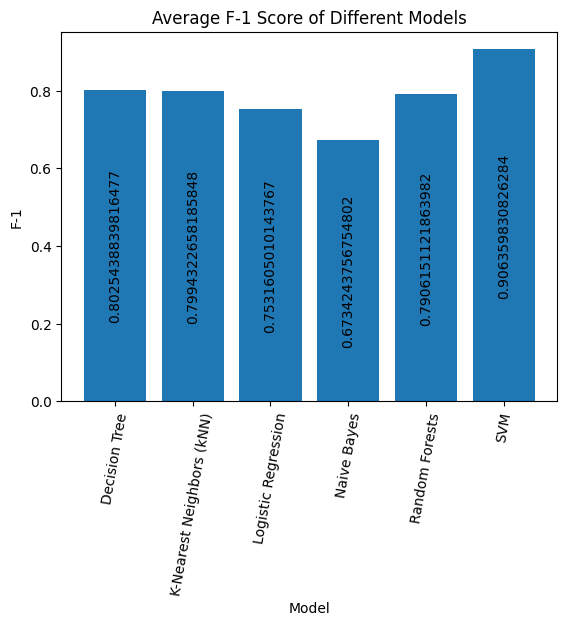

In [39]:
# Create a bar graph to visualize the average accuracy of different models
# model_names = accuracy_df['Model'].tolist()

barF = plt.bar(model_names, f1_values)
plt.bar_label(barF, labels=f1_values, label_type="center", rotation=90 )
plt.title('Average F-1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F-1')
plt.xticks(rotation=80)
plt.tight_layout
plt.show()

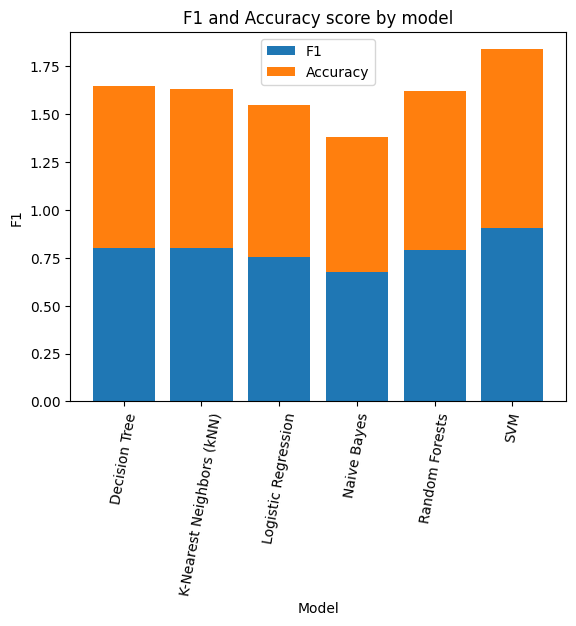

In [44]:
# create stacked bar chart

# model_names = accuracy_df['Model'].tolist()
# f1_values = accuracy_df['f1-score'].tolist()
# accuracy_values = accuracy_df['precision'].tolist()

plt.bar(model_names, f1_values, label='F1')
plt.bar(model_names, accuracy_values, bottom=f1_values, label='Accuracy')
plt.title('F1 and Accuracy score by model')
plt.xlabel('Model')
plt.ylabel('F1')
plt.xticks(rotation=80)
plt.legend(loc='upper center')
plt.tight_layout
plt.show()